# Assignment 5 - Sensors

8 points 

In this assignment you will work with the data from a laser scanner.

```bash
rosbag info laserscan.bag
```

This is a record of the data published by the LIDAR sensor. It publishes to `/scan`, `/scan_raw` and to `/tf`. Use the following to play the bagfile in a loop.

```bash
rosbag play -l laserscan.bag
```

In RViz you can see the TF frames, but not the scan. (Set the global frame to `base_footprint` to have the proper offset of the `laser` frame). 

Your task is to visualize the scan.

With the bagfile running, check the laser scanner topic
```
rostopic info /scan
```
It publishes a laser scan message of type `sensor_msgs/LaserScan`. Check out one of the publishes messages.
```
rostopic echo /scan -n 1
```
Following is an explanation of the fields.


The header indicates that the scan is with respect to the `/laser` frame.
```
header: 
  seq: 9214
  stamp: 
    secs: 1699884676
    nsecs: 649509920
  frame_id: "laser"
```

The angle min and max tell the range in radians.
```
angle_min: -2.356194496154785
angle_max: 2.356194496154785
```

In [ ]:
import math
print(f"2.356194496154785 in degrees is {math.degrees(2.356194496154785)}")

As you can see in the following illustration the scan goes from -135 to +135 degrees.

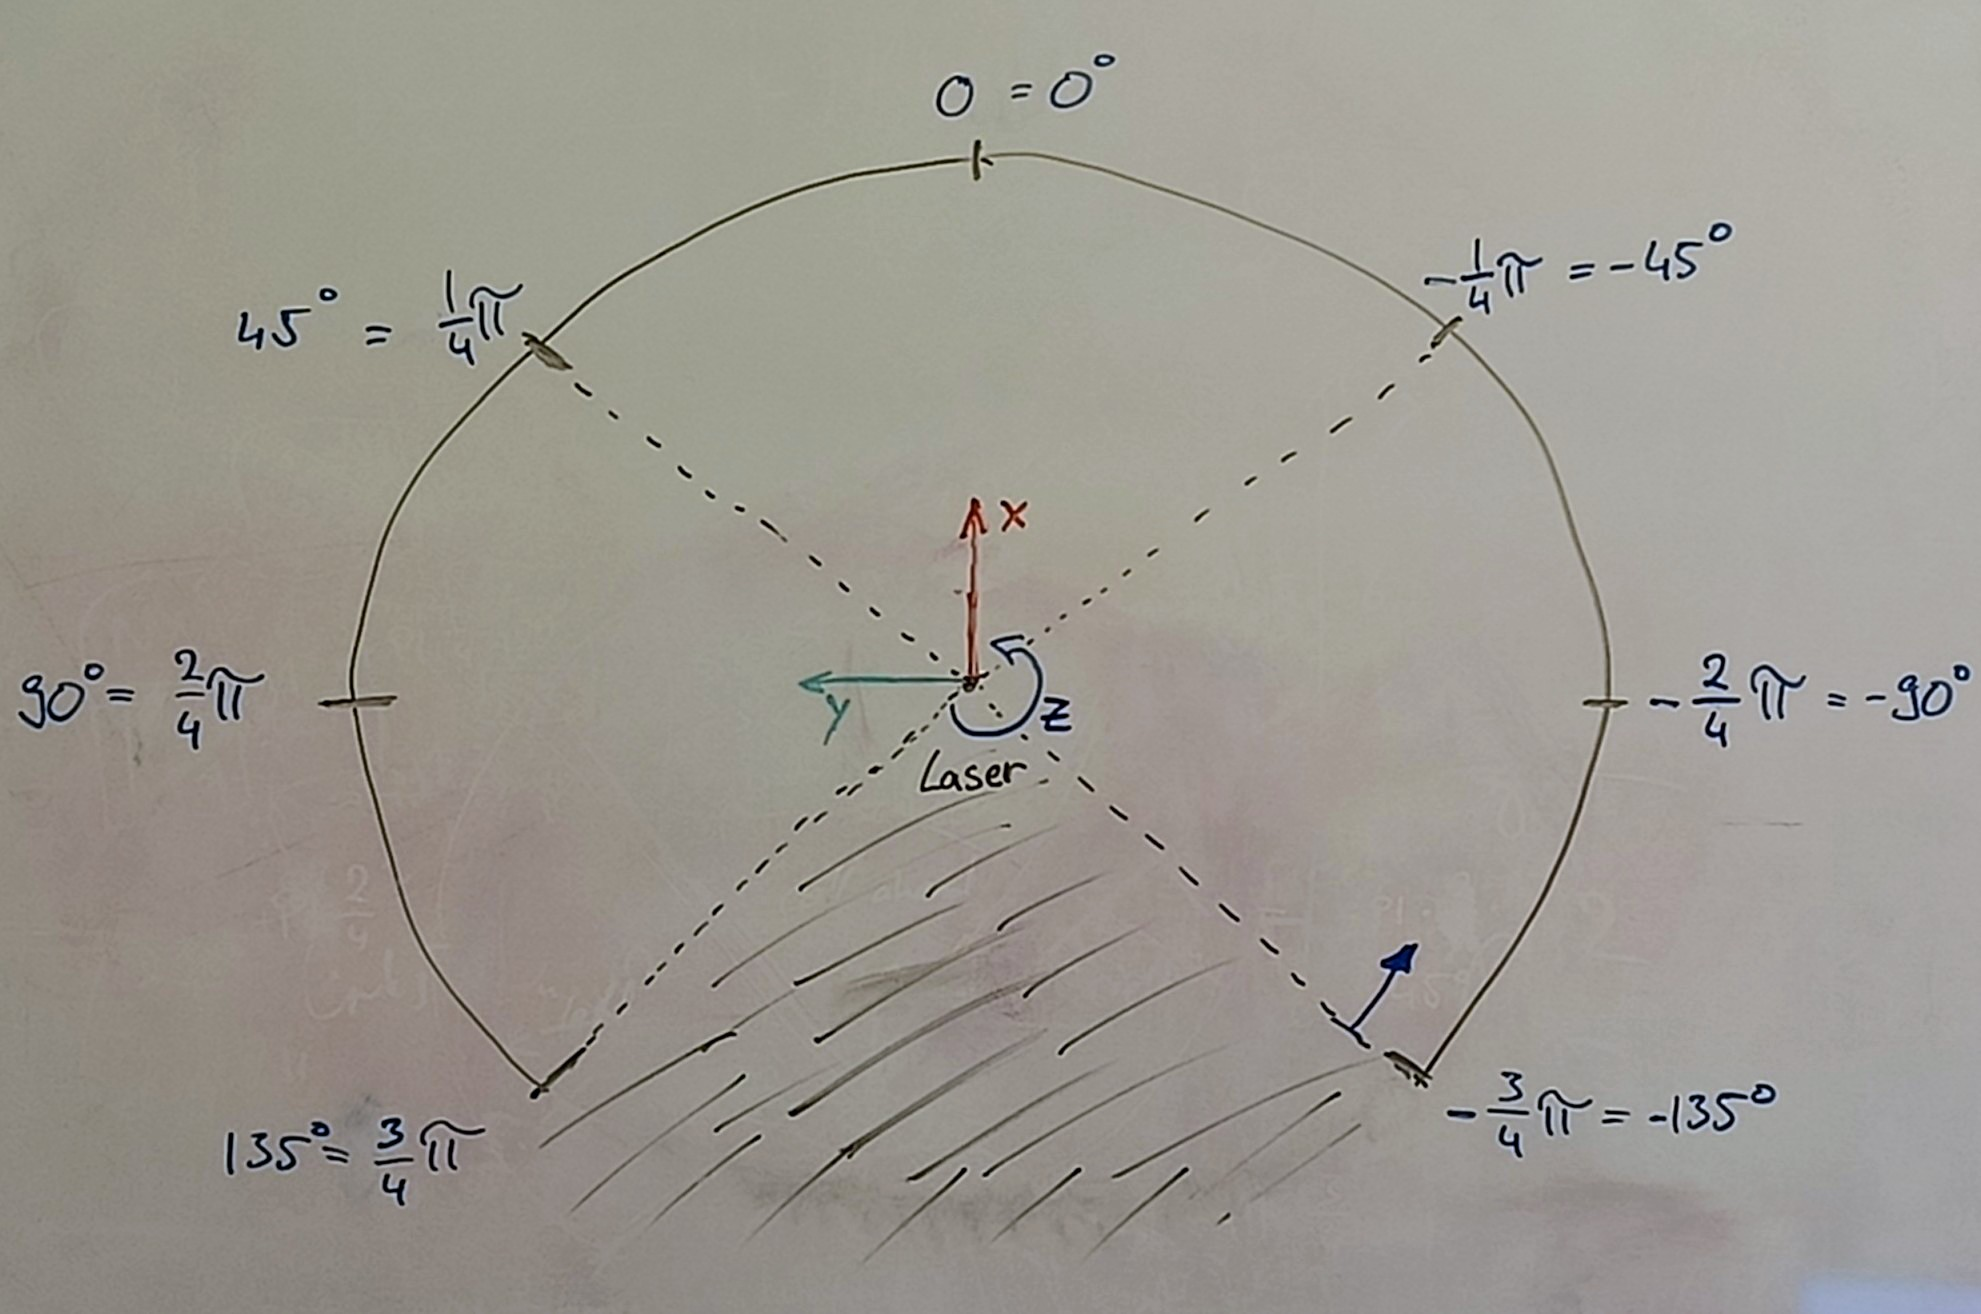

This defines at what rotational distance the datapoints increment. 
```
angle_increment: 0.004363323096185923
```

In [ ]:
math.degrees(0.004363323096185923)

An angle of 1/4 degree means there are 4 datapoints per degree, so there are 4 x 270 datapoints in total.

The time is irrelevant, the range indicates the maximum and minimum distance from the laser.
```
time_increment: 1.736111516947858e-05
scan_time: 0.02500000037252903
range_min: 0.019999999552965164
range_max: 30.0

```

The `ranges` are the main data you will be working with. Intensities can be ignored.
```
ranges: [1.23, 2.34, 3.45, ...] # 4 x 270 datapoints as distance in meter
intensities: [.., .., .]
```

## Task 1 - Calculate the degree and visualize

Visualize the data from the laser scanner in rvizweb like in the picture below. Some method definitions are given to provide an orientation for implementation. You can add more methods if necessary. 

The method definitions have been created with `Marker.Sphere` and `MarkerArray` in mind. Alternatively, you can use `Marker.SPHERE_LIST=7`, but then the methods have to be adapted.

Every message contains 1080 datapoints. This is very demanding for the system. Think about how you can filter the data so that the load on the system is reduced.

![](laserscan_rviz.png)

In [ ]:
import rospy
from visualization_msgs.msg import Marker, MarkerArray
from geometry_msgs.msg import Point
# other imports

In [ ]:
# your code goes here

In [ ]:
def translate_distance_and_angle_into_point(angle_in_degree, distance) -> Point:
    """
    The angle_in_degree is an angle between -135.0 and 135.0, the laser range.
        This is the angle of the /scan ranges vector entry.
    The distance is how far away the laser point is away from the laser. 
        This is the RANGES reading from the laser sensor
    Returns a point
    """

In [ ]:
translate_distance_and_angle_into_point(135.0, 2.0)

In [ ]:
def init_laser_point(laser_angle_in_degree, distance=2.0) -> Marker:
    """
    The laser_angle_in_degree is an angle between -135.0 and 135.0, the laser range.
        This is the angle of the /scan ranges vector entry.
    The distance is how far away the laser point is away from the laser. 
        This is the RANGES reading from the laser sensor. Default is 2m. 
    Returns a marker 
    """

In [ ]:
init_laser_point(0)

## Task 1.2 - Visualize every point

We have 1080 datapoints. Visualize every point with a distance of 2m. You can use the illustration of the scan as a reference.

In [ ]:
marker_array = MarkerArray()
# Your code goes here

In [ ]:
marker_array_pub = rospy.Publisher("/visualization_marker_array", MarkerArray, queue_size = 2)
rospy.init_node('rviz_marker')

In [ ]:
marker_array_pub.publish(marker_array)

## Task 1.3 - Subscriber to the scan 

The original frequency of the `/scan` topic is 25 Hz. To relax the traffic, let's reduce that to 1 Hz.

```bash
rosrun topic_tools throttle messages /scan 1.0
```

There is now the throttled topic `/scan_throttle` to subscribe to. Write a node that  subscribes to that throttled topic and visualize the datapoints like in the picture.

In [ ]:
## Imports and node init was done above already
## uncomment this to run the cell directly after a fresh kernel restart.

# import rospy
# from sensor_msgs.msg import LaserScan
# rospy.init_node('rviz_marker')

def laser_scan_callback(data):
    # Your code goes here
    marker_array_pub.publish(marker_array)
    
def laser_scan_listener():
    # Your code goes here 
    rospy.spin()

In [ ]:
laser_scan_listener()

You can restart the subscriber once per kernel restart.

## Task 2 - Collision alert!!

Write a collision warning system, predicting collisions by checking for scan data that is too close to the robot (0.5 meter). Segment the regions to "right", "front" and "left" and publish a warning to the topic of name `/collision_warning` with the type `/std_msgs/String`. Introduce a tolerance of markers necessary to trigger the message. 

In [ ]:
# Your code goes here

## Task 3 - Rosify

Create the launch file. The python code you wrote for the assignment can stay in this JupyterNotebook.